# NN use to predict a gvien ploynomial

In [ ]:
import numpy as np
dx=0.00000001
LR=0.1


defing the shape of NN and ploynomial

In [ ]:
size=[1,40,1]
def ploynoimal(x):
  return x*x

creating data set

In [ ]:
exampleNo=1000
labelSet=[]
featureSet=[]
for i in range(exampleNo):
  x=np.random.randint(100,1000)/100
  labelSet.append(ploynoimal(x))
  featureSet.append(x)

creating weigths and baises for NN

In [ ]:
def createWeigths(size):
  weigths=[]
  for layer in range(1,len(size)):
    Layer=[]
    for node in range(size[layer]):
      Node=[]
      for backNode in range(size[layer-1]):
        Node.append(np.random.randint(1,200)/100)
        # Node.append(1)
      Layer.append(Node)
    weigths.append(Layer)
  return weigths

def createBaises(size):
  baises=[]
  for layer in range(1,len(size)):
    Layer=[]
    for node in range(size[layer]):
      Layer.append(np.random.randint(1,200)/100)
      # Layer.append(1)
    baises.append(Layer)
  return baises


In [ ]:
def error(expected,predicted):
  return abs(expected-predicted)
def cost(expectedValues,predictedValues):
  if(len(expectedValues)!=len(predictedValues)):
    raise  Exception("(It is mine)len of pass arrugement are not equal,pls modify and check the value")
  cost=0
  for i in range(len(expectedValues)):
    cost+=error(expectedValues[i],predictedValues[i])
  return cost

activation function

In [ ]:
def ReLu(x):
  return abs(x)

runing a network

In [ ]:
weigths=createWeigths(size)
baises=createBaises(size)
def runNN(input):
  netwrokRun=[[input]]
  for layer in range(len(weigths)):
    Layer=[]
    for frontNode in range(len(weigths[layer])):
      netwrokRun[layer]
      weigths[layer][frontNode]
      Layer.append( ReLu( np.dot( netwrokRun[layer],weigths[layer][frontNode])+baises[layer][frontNode] ) )
    netwrokRun.append(Layer)
  return netwrokRun[len(netwrokRun)-1]
def speicalRunNN(input):
  netwrokRun=[[input]]
  for layer in range(len(weigths)):
    Layer=[]
    for frontNode in range(len(weigths[layer])):
      Layer.append( ReLu(np.dot( netwrokRun[layer],weigths[layer][frontNode])) )
    netwrokRun.append(Layer)
  return netwrokRun[len(netwrokRun)-1]

In [ ]:
def step(epoch,LR):
  return LR

# hard derivative for learing  

Stochastic gradient descent

In [ ]:
def SGD(startPoint,endPoint,epochSize):
  for example in range(startPoint,endPoint):
    for epoch in range(epochSize):
      for layer in range(len(weigths)):
        for  frontNode in range(len(weigths[layer])):
          for node in range(len(weigths[layer][frontNode])):
            error1=cost( [labelSet[example]], runNN(featureSet[example]))
            weigths[layer][frontNode][node]+=dx
            error2=cost( [labelSet[example]] , runNN(featureSet[example]))
            weigths[layer][frontNode][node]-=dx
            weigths[layer][frontNode][node]-=LR*((error2-error1)/dx)

      for layer in range(len(baises)):
        for frontNode in range(len(baises[layer])):
            error1=cost( [labelSet[example]], runNN(featureSet[example]))
            baises[layer][frontNode]+=dx
            error2=cost( [labelSet[example]] , runNN(featureSet[example]))
            baises[layer][frontNode]-=dx
            baises[layer][frontNode]-=LR*((error2-error1)/dx)



function for total cost

In [ ]:
def totalCost():
  total=0
  for example in range(exampleNo):
    total+=cost( [labelSet[example]],runNN(featureSet[example]) )
  return total/(2*exampleNo)

performing trainig

In [ ]:
runNN(100)

In [13]:
epochNo=30
for epoch in range(epochNo):
  beingCost=totalCost()
  for layer in range(len(weigths)):
      for  frontNode in range(len(weigths[layer])):
        error1=totalCost()
        baises[layer][frontNode]+=dx
        error2=totalCost()
        baises[layer][frontNode]-=dx
        baises[layer][frontNode]-=step(epoch,LR)*((error2-error1)/dx)

        for node in range(len(weigths[layer][frontNode])):
          error1=totalCost()
          weigths[layer][frontNode][node]+=dx
          error2=totalCost()
          weigths[layer][frontNode][node]-=dx
          weigths[layer][frontNode][node]-=( step(epoch,LR)*((error2-error1)/dx) )

  endCost=totalCost()
  print(' the result of epoch {0}; starting Cost:{1},ending Cost:{2},cost decreased:{3} '.format(epoch,beingCost,endCost,beingCost-endCost))
  # print(epoch)



 the result of epoch 0; starting Cost:96.75633101199995,ending Cost:30.132077091185103,cost decreased:66.62425392081485 
 the result of epoch 1; starting Cost:30.132077091185103,ending Cost:8.559452796285278,cost decreased:21.572624294899825 
 the result of epoch 2; starting Cost:8.559452796285278,ending Cost:7.5229178825159595,cost decreased:1.0365349137693185 
 the result of epoch 3; starting Cost:7.5229178825159595,ending Cost:7.122277584348946,cost decreased:0.40064029816701385 
 the result of epoch 4; starting Cost:7.122277584348946,ending Cost:6.770113823430732,cost decreased:0.3521637609182138 
 the result of epoch 5; starting Cost:6.770113823430732,ending Cost:6.266582966795238,cost decreased:0.5035308566354937 
 the result of epoch 6; starting Cost:6.266582966795238,ending Cost:6.03683687944556,cost decreased:0.22974608734967816 
 the result of epoch 7; starting Cost:6.03683687944556,ending Cost:5.774042493023365,cost decreased:0.2627943864221951 
 the result of epoch 8; start

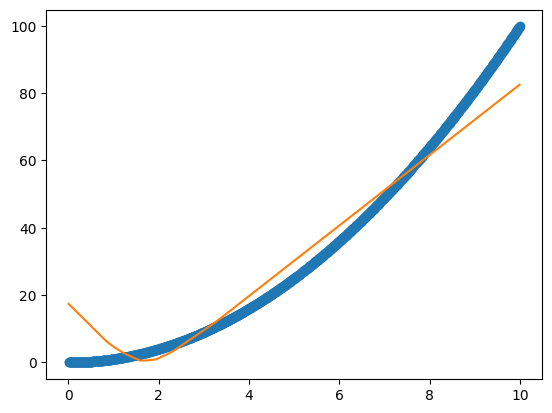

In [14]:
x1=[]
y1=[]
x2=[]
y2=[]

for i in range(1,1000):
  x1.append(i/100)
  y1.append(ploynoimal(i/100))
  y2.append(runNN(i/100))
import matplotlib.pyplot as plt
plt.plot(x1, y1,'o')
plt.plot(x1, y2)
plt.show()